# Correlation
* The Pearson Correlation Coefficient
* R-squared Coefficient of Determination

<hr>

#### The Pearson Correlation Coefficient

*(see more details in 1_Describing_Distributions.ipynb)*

<strong>Covariance</strong> provides a measure of how related the variables are to each other:
\begin{align}
\tag{9.1}
\text{COV}(x,y)=\frac{\textstyle\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{n}
\end{align}

<strong>Correlation</strong> builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. The correlation coefficient is often denoted with $r$ or $\rho$ and is defined by:
\begin{align}
\tag{9.2}
P_{x,y}=\frac{COV(x,y)}{\sigma_x \sigma_y}
\end{align}


In [9]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
iris = sns.load_dataset('iris')

x = iris.sepal_length
y = iris.petal_length

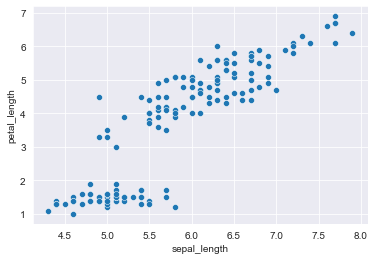

In [12]:
sns.set_style('darkgrid')
_ = sns.scatterplot(x=x, y=y)

In [13]:
n = iris.sepal_width.size
xbar, ybar = x.mean(), y.mean()

In [14]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

cov = sum(product)/n
cov

1.2658200000000006

In [15]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

We reached this point in *Probability*. Now, as for ow to determine a p-value, we first calculate the t-statistics...

\begin{align}
\tag{9.3}
t=r\sqrt{\frac{n-2}{1-r^2}}
\end{align}

In [19]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.646019345759807

In [23]:
# convert to p-value 
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

p = p_from_t(t, n-1)
p

1.0386674194495906e-47

In [24]:
np.log10(p)

-46.98352349096045

This confirms that iris sepal length is extremely positively correlated with petal length.

All of the above can be done in a single line with SciPy's <code>pearsonr()</code> method:

In [25]:
st.pearsonr(x, y)  # output=(r, p-value)

(0.8717537758865832, 1.0386674194497525e-47)

And, for reference, here's a correlation that is not significant ($r\approx0$)

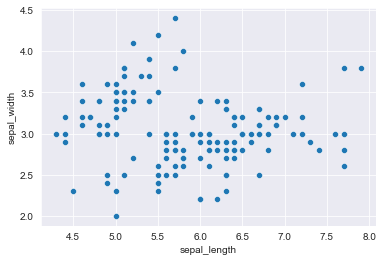

In [26]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [27]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

(-0.11756978413300204, 0.15189826071144918)

<hr>

#### R-squared Coefficient of Determination

...also known as $r^2$, this is the proportion of variance in one variable explained by another.\
It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [28]:
rsq = r**2
rsq

0.7599546457725157

In this case, it indicates that 76% of the variance in iris petal length can be explained by sepal length. (This is easier to understand where one variable could straightforwardly drive variation in the other; more on that in Segment2.)

In [29]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080698

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length.

<hr>

#### Correcting for Multiple Comparisons

Approaches for adjusting $\alpha$ for multiple comparisons exist, among which the most widely-used solution is the <strong>Bonferroni correction</strong> (named after the 20th c. Italian mathematician Carlo Emilio Bonferroni)

For the number of tests ($m$), the significance threshold for each individual test is $\frac{\alpha}{m}$.